In [1]:
import numpy as np
import scipy
import scipy.integrate
import matplotlib.pyplot as plt

## Pendulum Dynamics

$ m l^2 \ddot{\theta} = m g l \sin(\theta) + u(t)$

$ \ddot{\theta} = \dfrac{g}{l} \sin(\theta) + \dfrac{1}{ml^2} u(t)$

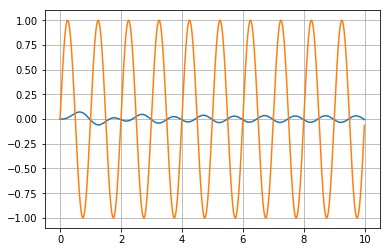

In [8]:
def sim_pend(f, tf, dt):
    g = 9.8
    m = 1
    l = 1
    t = np.arange(0, tf, dt)

    def f_in(t):
        omega = 2*np.pi*f
        return np.sin(omega*t)

    def f_pend(t, x, f_in):
        theta, omega = x
        theta_dot = omega
        omega_dot = -(g/l)*np.sin(theta) - 1*omega + f_in(t)
        return [theta_dot, omega_dot]


    res = scipy.integrate.solve_ivp(fun=lambda t, x: f_pend(t, x, f_in), t_span=[t[0], t[-1]], y0=[0, 0], t_eval=t)
    return t, res['y'].T, f_in(t)

t, y, u = sim_pend(f=1, tf=10, dt=0.01)
plt.plot(t, y[:, 0])
plt.plot(t, u)
plt.grid()

In [3]:
freq = np.array([0.1, 0.15, 0.2, 0.5, 1, 2])
amp = np.array([0.1, 0.1, 0.1, 0.25, 0.05, 0.01])
amp = amp/amp[0]  # we don't care about absolute magnitude
import control

Text(0.5, 0, 'freq, Hz')

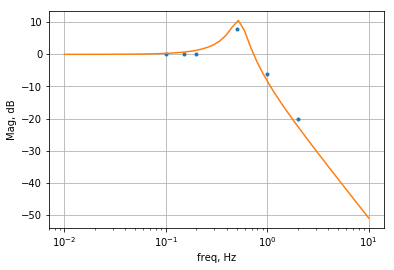

In [4]:
s = control.tf([1, 0], [0, 1])
wn = 0.53
zeta = 0.15
G = wn**2/(s**2 + 2*zeta*wn*s + wn**2)
mag, phase, omega = control.bode(G, Plot=False)
mag = mag/mag[0]  # we don't care about absolute magnitude
amp_dB = 20*np.log10(amp)
mag_dB = 20*np.log10(mag)
plt.semilogx(freq, amp_dB, '.');
plt.semilogx(omega, mag_dB, '-');
plt.grid()
plt.ylabel('Mag, dB')
plt.xlabel('freq, Hz')

In [5]:
H_lowpass = wn/10 /(s + wn/10)
H_lowpass


  0.053
---------
s + 0.053

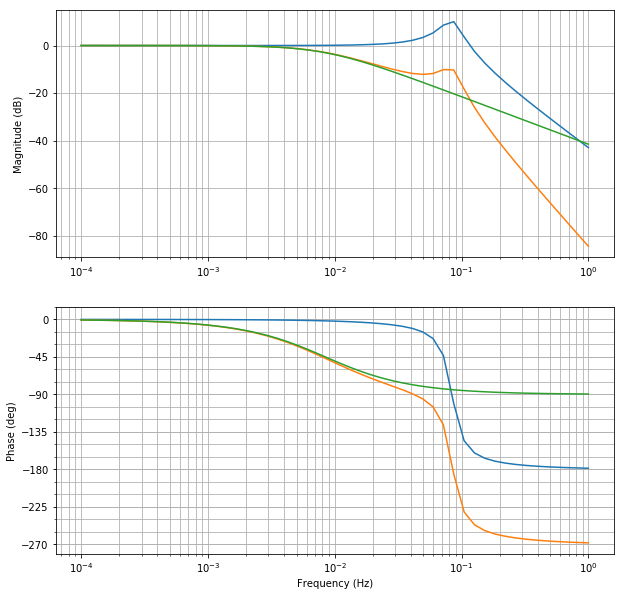

In [6]:
plt.figure(figsize=(10, 10))
control.bode([G, G*H_lowpass, H_lowpass], Hz=True, dB=True);

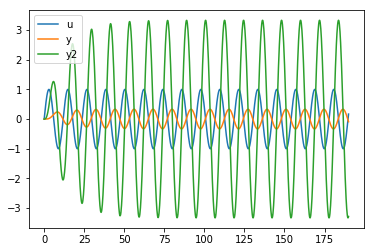

In [7]:
t = np.linspace(0, 190, 1000)
u = np.sin(t*wn)
t, y, x = control.forced_response(G*H_lowpass, U=u, T=t)
t, y2, x = control.forced_response(G, U=u, T=t)

plt.plot(t, u, label='u')
plt.plot(t, y, label='y')
plt.plot(t, y2, label='y2')
plt.legend()